In [1]:
from pynq import Device
from pynq import Overlay
from pynq import allocate
import numpy as np
import matplotlib.pyplot as plt
from MPC_api import MPC
import sys
import time

In [2]:
for i in range(len(Device.devices)):
    print("{}) {}".format(i, Device.devices[i].name))
overlay = Overlay('FDTD_TMz_new.awsxclbin', device = Device.devices[0])

0) xilinx_aws-vu9p-f1_shell-v04261818_201920_3


In [27]:
# initilize
c = 299792458
wavelength = 1550e-9
f0 = c / wavelength
Ny = 400
Nx = 2500
NT = 12000
space = MPC(2500,400,8,44,wavelength = wavelength)

# allocate memory
C = allocate((Nx, Ny), dtype = 'float32', target = overlay.bank0)
Ca = allocate((Nx, Ny), dtype = 'float32', target = overlay.bank0)
source = allocate((NT,), dtype = 'float32', target = overlay.bank0)
out_f1 = allocate((NT,), dtype = 'float32', target = overlay.bank0)
out_f2 = allocate((NT,), dtype = 'float32', target = overlay.bank0)

# location
src_row = 30
src_col = 150
det_f1_row = 2450
det_f1_col = 105
det_f1_row = 455
det_f1_col = 150
det_f2_row = 2450
det_f2_col = 195

#add successively one by one
t_index = np.arange(0,NT)
source[:] = 0.5* np.sin(2 * np.pi * f0 * t_index * space.dt)
ss = time.time()
source.sync_to_device()
# space.PatternDopping(7,17)
# space.PatternDopping(2,22)
# space.PatternDopping(2,1)
# space.PatternDopping(7,43)
# space.PatternDopping(7,42)
# space.PatternDopping(7,30)
space.export(Ca,C)
C.sync_to_device()
Ca.sync_to_device()
# No perturbations
task_on = overlay.FDTD_Kernel_1.start(out_f1, out_f2, source, C, Ca, NT, Nx,src_row, src_col, det_f1_row, det_f1_col, det_f2_row, det_f2_col)
task_on.wait()
out_f1.sync_from_device()
out_f2.sync_from_device()
ee= time.time()
print(ee-ss)
E1 = np.var(out_f1[-1000:])
E2 = np.var(out_f2[-1000:])
print('E1 =',E1)
print('E2 =',E2)

0.29774928092956543
E1 = 0.005458745
E2 = 0.0024826413


In [29]:
E2 * 2/E1

PynqBuffer(0.90960145)

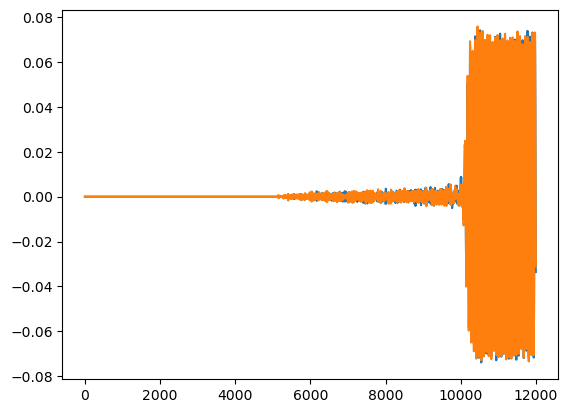

In [23]:
plt.plot(out_f1[:])
plt.plot(out_f2[:])

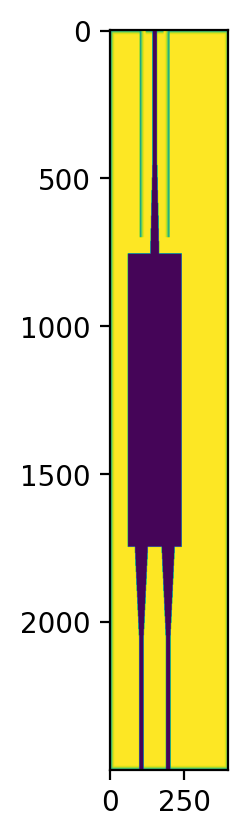

In [21]:
plt.figure(dpi=200)
plt.imshow(Ca)

In [12]:
space.PatternDopping(7,43)

In [16]:
space.export(Ca,C)

In [55]:
Ca[0,0]

0.49005

In [15]:
space.reset()

In [10]:
0.13*2/0.369


0.7046070460704608

In [13]:
0.13*2/0.29


0.8965517241379312